# Tree build and query times, comparison

Here, we compare the times to build and query KDTree and BallTree.

In [1]:
# solve issue with autocomplete
%config Completer.use_jedi = False

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from geotree import gtree
import numpy as np
import time

## Build time

In [3]:
million = 1000000
list_npoints = [million // 100, 
                4 * million // 100, 
                million // 10, 
                4 * million // 10, 
                1*million, 5*million, 
                10*million]

### KDTree

In [4]:
build_times_kdt = []

mytree = gtree()
del mytree

for npoints in list_npoints:
    print(npoints)
    mytree = gtree()
    
    lons = np.random.randint(-180, 180, npoints)
    lats = np.random.randint(-90, 90, npoints)
    depths = np.zeros(npoints)

    # Add lons/lats/depths of the first set of points
    mytree.add_lonlatdep(lons=lons, 
                         lats=lats, 
                         depths=depths)
    
    t1 = time.time()
    mytree.create_kdt()
    build_times_kdt.append(time.time() - t1)
    del mytree

10000
40000
100000
400000
1000000
5000000
10000000


### BallTree

In [5]:
build_times_ball = []

mytree = gtree()
del mytree

for npoints in list_npoints:
    print(npoints)
    mytree = gtree()
    
    lons = np.random.randint(-180, 180, npoints)
    lats = np.random.randint(-90, 90, npoints)
    depths = np.zeros(npoints)

    # Add lons/lats/depths of the first set of points
    mytree.add_lonlatdep(lons=lons, 
                         lats=lats, 
                         depths=depths)
    
    t1 = time.time()
    mytree.create_kdt()
    build_times_ball.append(time.time() - t1)
    del mytree

10000
40000
100000
400000
1000000
5000000
10000000


## Query time

In [6]:
# Define the first set of points, aka base.
npoints = 1*million

lons = np.random.randint(-180, 180, npoints)
lats = np.random.randint(-90, 90, npoints)
depths = np.zeros(npoints)

In [7]:
list_queries = [million // 100, 
                4 * million // 100, 
                million // 10, 
                4 * million // 10, 
                1*million, 5*million, 
                10*million]

### KDTree

In [8]:
mytree = gtree()

# Add lons/lats/depths of the first set of points
mytree.add_lonlatdep(lons=lons, 
                     lats=lats, 
                     depths=depths)

In [9]:
mytree.create_kdt()

In [10]:
query_times_kdt = []

for q_npoints in list_queries:
    print(q_npoints)

    q_lons = np.random.randint(-180, 180, q_npoints)
    q_lats = np.random.randint(-90, 90, q_npoints)
    q_depths = np.zeros(q_npoints)
    
    # Add lons/lats/depths of queries
    mytree.add_lonlatdep_query(lons=q_lons, 
                               lats=q_lats, 
                               depths=q_depths)
    
    t1 = time.time()
    mytree.query_kdt()
    query_times_kdt.append(time.time() - t1)

10000
40000
100000
400000
1000000
5000000
10000000


### Ball tree

In [11]:
del mytree
mytree = gtree()

# Add lons/lats/depths of the first set of points
mytree.add_lonlatdep(lons=lons, 
                     lats=lats, 
                     depths=depths)

In [12]:
mytree.create_balltree()

In [13]:
query_times_ball = []

for q_npoints in list_queries:
    print(q_npoints)
    
    q_lons = np.random.randint(-180, 180, q_npoints)
    q_lats = np.random.randint(-90, 90, q_npoints)
    q_depths = np.zeros(q_npoints)
    
    # Add lons/lats/depths of queries
    mytree.add_lonlatdep_query(lons=q_lons, 
                               lats=q_lats, 
                               depths=q_depths)
    
    t1 = time.time()
    mytree.query_balltree()
    query_times_ball.append(time.time() - t1)

10000
40000
100000
400000
1000000
5000000
10000000


## Plot results

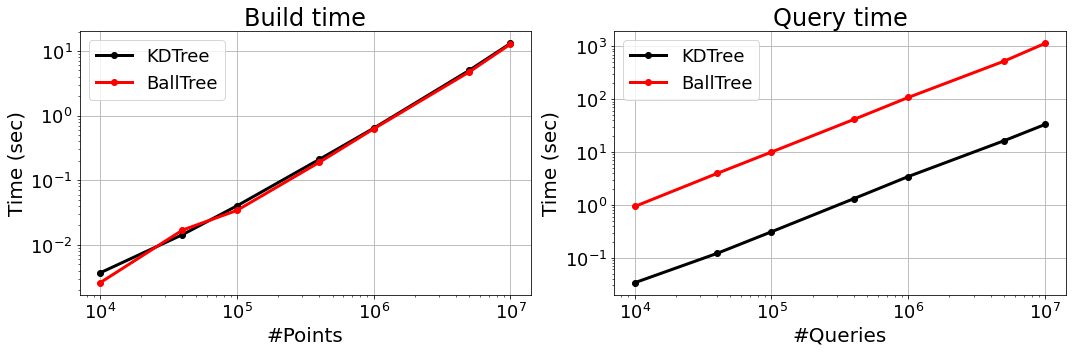

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

# --- Build time
plt.subplot(1, 2, 1)
plt.plot(list_npoints, build_times_kdt, 
         marker="o", c="k", lw=3, 
         label="KDTree")
plt.plot(list_npoints, build_times_ball, 
         marker="o", c="r", lw=3, 
         label="BallTree")

plt.legend(fontsize=18)
plt.xscale("log"); plt.yscale("log")
plt.xticks(size=18); plt.yticks(size=18)
plt.grid()

plt.xlabel("#Points", size=20)
plt.ylabel("Time (sec)", size=20)
plt.title("Build time", size=24)

# --- Query time
plt.subplot(1, 2, 2)

plt.plot(list_queries, query_times_kdt, 
         marker="o", c="k", lw=3, 
         label="KDTree")
plt.plot(list_queries, query_times_ball, 
         marker="o", c="r", lw=3, 
         label="BallTree")

plt.legend(fontsize=18)
plt.xscale("log"); plt.yscale("log")
plt.xticks(size=18); plt.yticks(size=18)
plt.grid()

plt.xlabel("#Queries", size=20)
plt.ylabel("Time (sec)", size=20)
plt.title("Query time", size=24)

plt.tight_layout()
plt.show()